# Trabalho final - AED individual

## Importando pacotes e bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importando a base de dados

### De .pkl

In [2]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")

## Informações básicas do dataframe

In [3]:
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1302 non-null   category
 1   typename           1302 non-null   category
 2   inches             1302 non-null   category
 3   screen_resolution  1302 non-null   category
 4   x_screen           1302 non-null   int16   
 5   y_screen           1302 non-null   int16   
 6   cpu_manufacturer   1302 non-null   category
 7   cpu_ghz            1302 non-null   float32 
 8   gpu_manufacturer   1302 non-null   category
 9   ram_gb             1302 non-null   uint8   
 10  memory_0_gb        1302 non-null   int16   
 11  memory_0_type      1302 non-null   category
 12  memory_1_gb        1302 non-null   int16   
 13  memory_1_type      1302 non-null   category
 14  opsys              1302 non-null   category
 15  weight_kg          1302 non-null   float32 
 16  price_

In [4]:
laptop_price.sample(10)

,company,typename,inches,screen_resolution,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
255,Dell,Ultrabook,14-,1920x1080,1920,1080,Intel,1.60,Intel,8,256,ssd,0,empty,Windows,1.41,949.00
483,Chuwi,Notebook,14~16,1920x1080,1920,1080,Intel,1.44,Intel,4,64,flash storage,0,empty,Windows,1.89,248.90
811,MSI,Gaming,16+,1920x1080,1920,1080,Intel,2.80,Nvidia,16,512,ssd,1000,hdd,Windows,2.90,2415.00
1280,HP,Notebook,14~16,1920x1080,1920,1080,AMD,2.90,AMD,6,1000,hybrid,0,empty,Windows,2.04,549.99
190,Lenovo,2 in 1 Convertible,14~16,2560x1440,2560,1440,Intel,2.70,Intel,16,1000,ssd,0,empty,Windows,1.42,2824.00
594,Lenovo,Notebook,16+,1920x1080,1920,1080,Intel,2.00,Intel,4,500,hdd,0,empty,Outros,2.80,529.00
485,Lenovo,Notebook,14~16,1920x1080,1920,1080,Intel,1.60,Intel,8,256,ssd,0,empty,Windows,1.75,1049.00
43,Acer,Notebook,14~16,1920x1080,1920,1080,Intel,1.60,Intel,4,256,ssd,0,empty,Windows,2.20,682.00
641,HP,Notebook,16+,1600x900,1600,900,AMD,3.00,AMD,8,1000,hdd,0,empty,Windows,2.60,520.90
764,Dell,Notebook,14-,1366x768,1366,768,Intel,2.00,Intel,4,500,hdd,0,empty,Windows,1.65,849.00


In [5]:
laptop_price.describe()

,x_screen,y_screen,cpu_ghz,ram_gb,memory_0_gb,memory_1_gb,weight_kg,price_euros
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,1894.396313,1070.423963,2.299001,8.385561,442.930876,168.417819,2.039416,1124.043894
std,494.632661,284.250096,0.506467,5.085166,356.180662,402.746234,0.665274,699.158856
min,1366.000000,768.000000,0.900000,2.000000,8.000000,0.000000,0.690000,174.000000
25%,1600.000000,900.000000,2.000000,4.000000,256.000000,0.000000,1.500000,599.000000
50%,1920.000000,1080.000000,2.500000,8.000000,256.000000,0.000000,2.040000,978.000000
75%,1920.000000,1080.000000,2.700000,8.000000,512.000000,0.000000,2.300000,1488.435000
max,3840.000000,2160.000000,3.600000,64.000000,2000.000000,2000.000000,4.700000,6099.000000


## Tratamento de dados e normalizações

### Remoção de espaços em branco

In [6]:
# Não foi necessário!!!

### Passando os títulos para lowercase

In [7]:
# Não foi necessário!!!

### Demais tratamentos

#### Empresas vendedoras

In [6]:
companies = laptop_price.company.unique().copy()
i = int(1)

for actual_company in companies:
    print(f"Empresa {i}\t:\t{actual_company}")
    i = 1 + i

Empresa 1	:	Apple
Empresa 2	:	HP
Empresa 3	:	Acer
Empresa 4	:	Asus
Empresa 5	:	Dell
Empresa 6	:	Lenovo
Empresa 7	:	Chuwi
Empresa 8	:	MSI
Empresa 9	:	Microsoft
Empresa 10	:	Toshiba
Empresa 11	:	Huawei
Empresa 12	:	Xiaomi
Empresa 13	:	Vero
Empresa 14	:	Razer
Empresa 15	:	Mediacom
Empresa 16	:	Samsung
Empresa 17	:	Google
Empresa 18	:	Fujitsu
Empresa 19	:	LG


#### cpu

In [8]:
laptop_price.cpu_manufacturer.unique()

['Intel', 'AMD']
Categories (2, object): ['AMD', 'Intel']

In [10]:
laptop_price.sample(5)

,company,typename,inches,screen_resolution,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
1167,Lenovo,Notebook,14~16,1920x1080,1920,1080,Intel,2.0,Nvidia,4,1000,hdd,0,empty,Windows,2.20,468.0
95,Acer,2 in 1 Convertible,14-,1920x1080,1920,1080,Intel,1.6,Intel,8,256,ssd,0,empty,Windows,1.50,847.0
336,Dell,Ultrabook,14~16,1920x1080,1920,1080,Intel,1.6,Nvidia,8,128,ssd,1000,hdd,Windows,1.90,1049.0
798,Lenovo,2 in 1 Convertible,14-,1920x1080,1920,1080,Intel,2.7,Intel,8,256,ssd,0,empty,Windows,1.38,1349.0
719,HP,Notebook,16+,1920x1080,1920,1080,Intel,2.7,Nvidia,8,256,ssd,0,empty,Windows,2.63,1200.0


## Exploração de dados

### Bar

In [11]:
def make_bar_plot(data: any, x_axis: any, y_axis: any, x_ticket: any, y_ticket: any, rotation = 0) -> None:
    figure = plt.figure(figsize = (12, 6))
    plt.bar(x = x_axis,
            height= y_axis,
            data = data,
            color = "#A03312",
            width = 0.5
        )
    plt.xlabel(x_ticket, fontsize = 16)
    plt.ylabel(y_ticket, fontsize = 14)
    plt.xticks(rotation = rotation, size = 12)
    plt.yticks(size = 12)
    plt.title("Média dos preços")
    plt.show()

##### Preço por marca

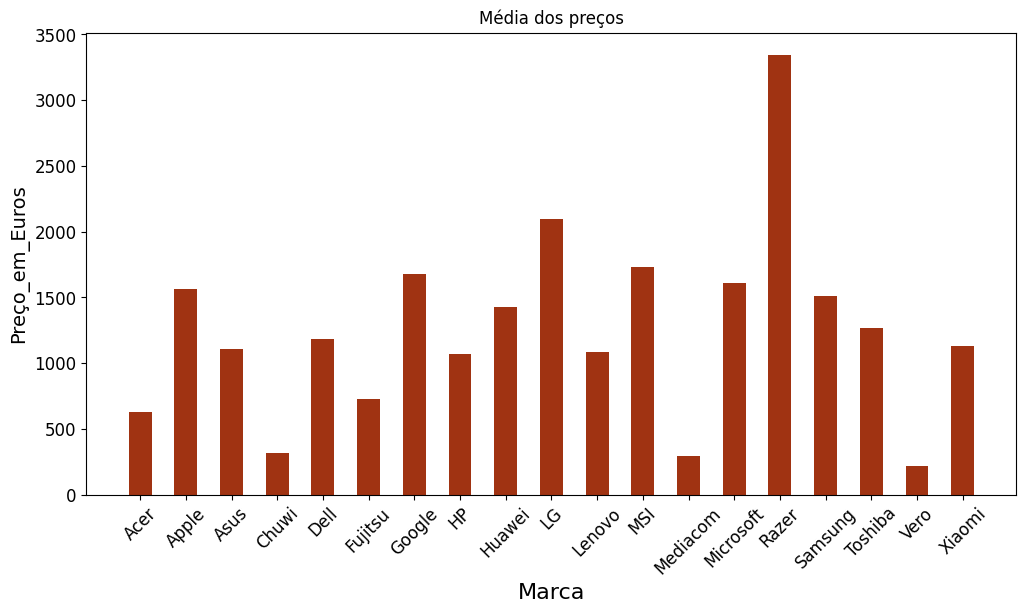

In [12]:
data = laptop_price.groupby(by = "company", as_index = False)["price_euros"].mean()
make_bar_plot(data, "company", "price_euros", "Marca", "Preço_em_Euros", 45)

##### Preço por cpu

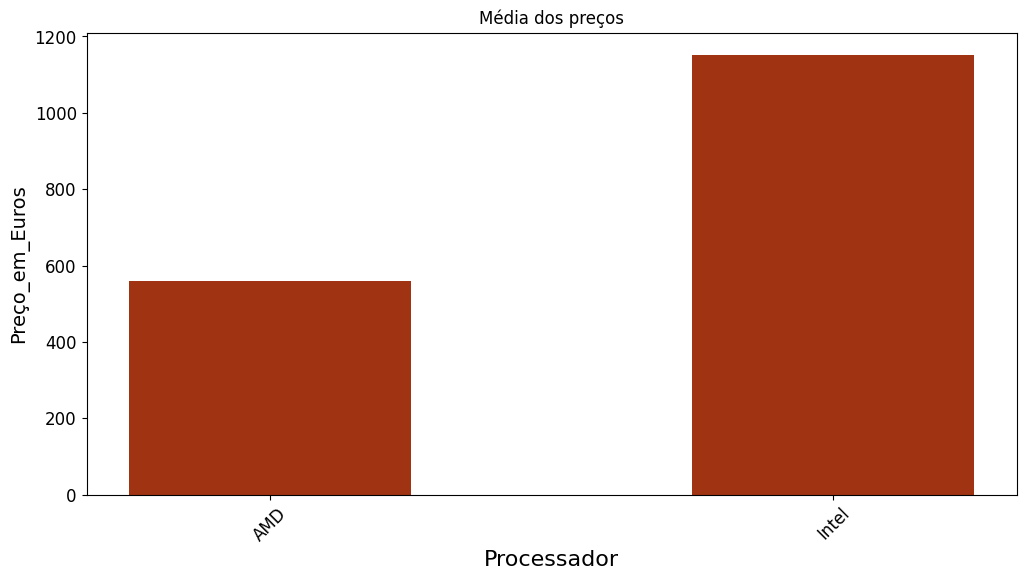

In [13]:
data = laptop_price.groupby(by = "cpu_manufacturer", as_index = False)["price_euros"].mean()
make_bar_plot(data, "cpu_manufacturer", "price_euros", "Processador", "Preço_em_Euros", 45)

##### Preço por gpu

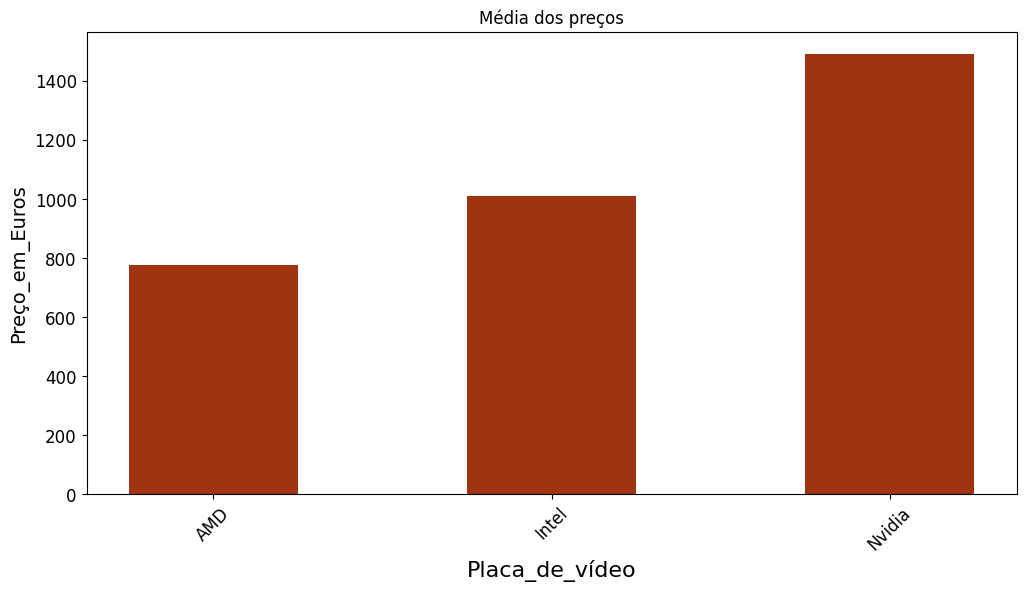

In [14]:
data = laptop_price.groupby(by = "gpu_manufacturer", as_index = False)["price_euros"].mean()
make_bar_plot(data, "gpu_manufacturer", "price_euros", "Placa_de_vídeo", "Preço_em_Euros", 45)

#### Resolução de tela (em pixels)

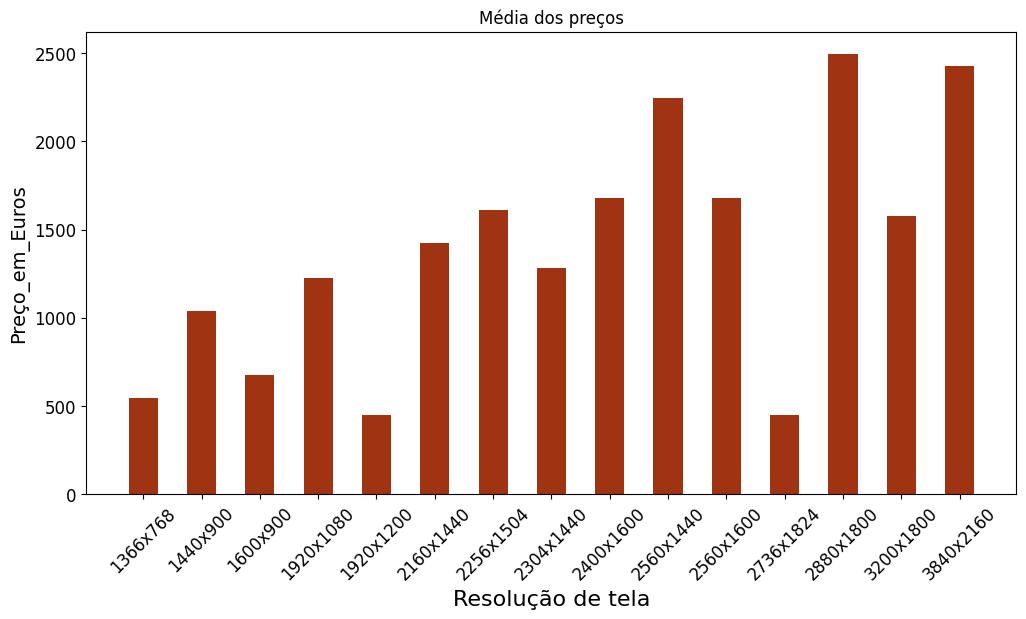

In [15]:
data = laptop_price.groupby(by = "screen_resolution", as_index = False)["price_euros"].mean()
make_bar_plot(data, "screen_resolution", "price_euros", "Resolução de tela", "Preço_em_Euros", 45)

### BoxPlot

In [16]:
def make_box_plot(data_frame:any, x_arg: any, y_arg: any, title = "Sem título", rotate = 90) -> None:
    figure, axis = plt.subplots(figsize = (12, 6))
    sns.boxplot(
        data = data_frame,
        x = x_arg,
        y = y_arg,
        ax = axis
    )
    plt.title(title)
    plt.xticks(rotation = rotate)
    plt.show()

##### Preço por marca

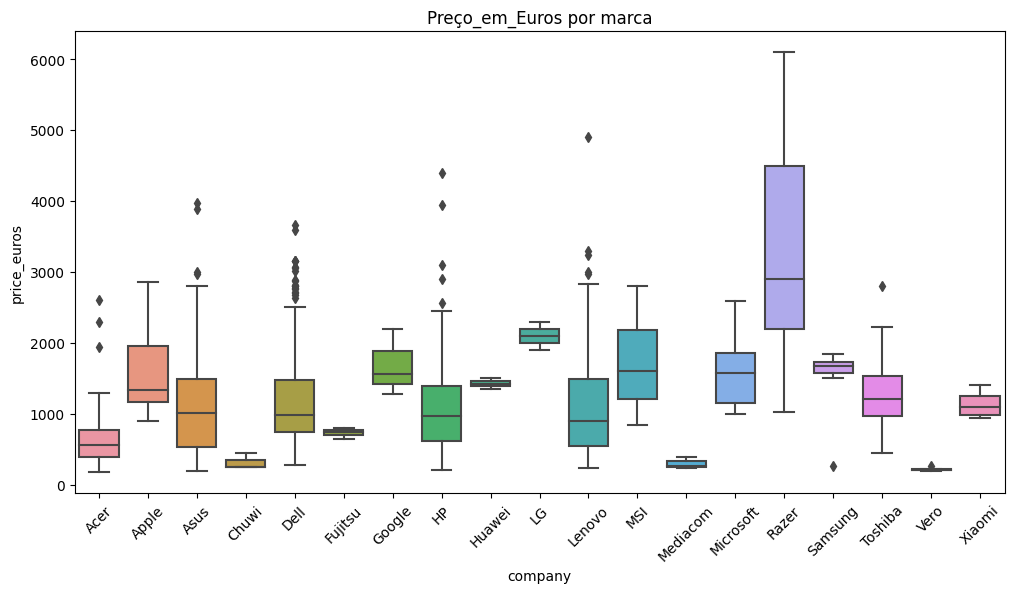

In [17]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "company", title = "Preço_em_Euros por marca", rotate = 45)

##### Preço por cpu

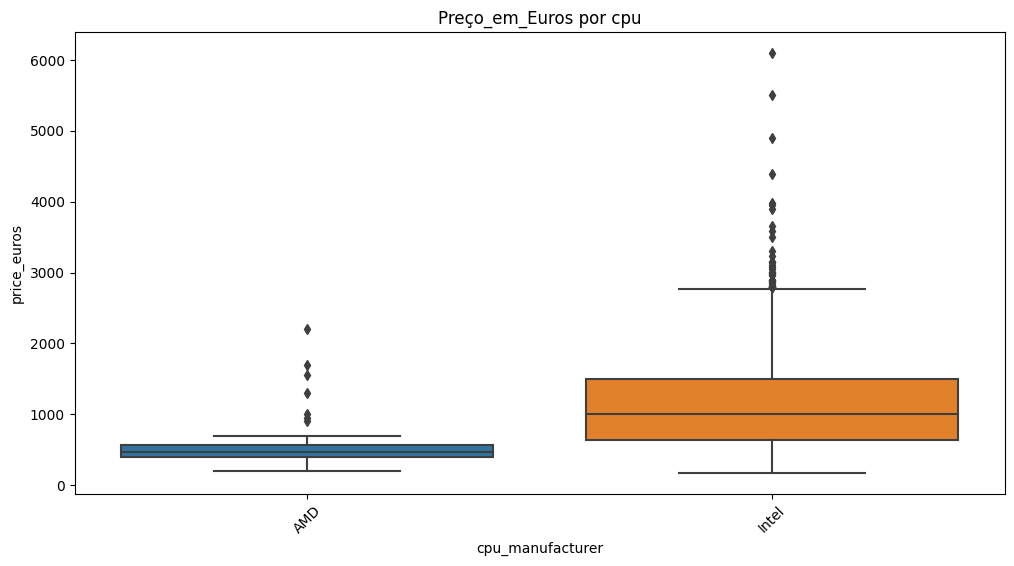

In [19]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "cpu_manufacturer", title = "Preço_em_Euros por cpu", rotate = 45)

##### Preço por gpu

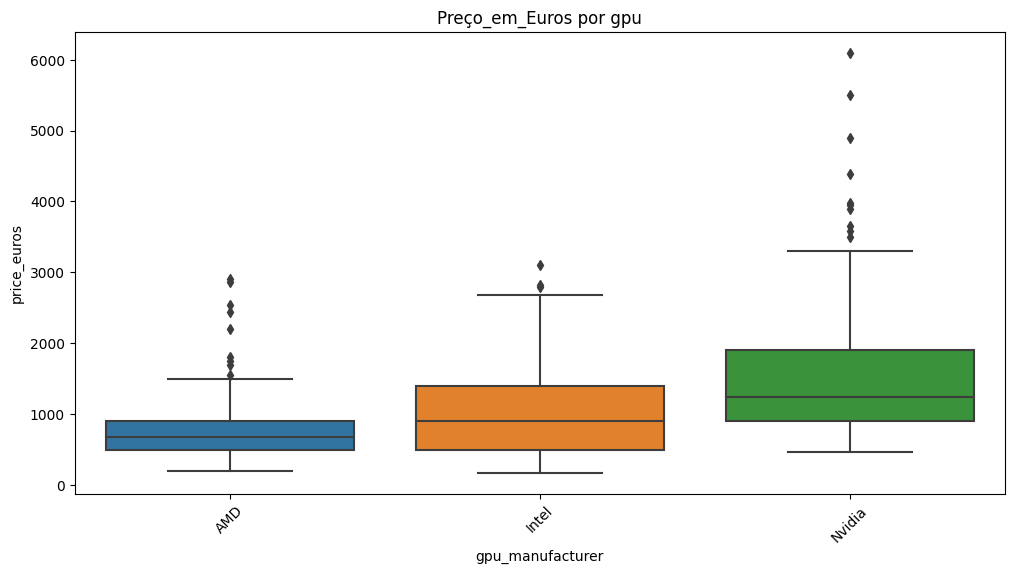

In [20]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "gpu_manufacturer", title = "Preço_em_Euros por gpu", rotate = 45)

#### Preço por resolução de tela (em pixels)

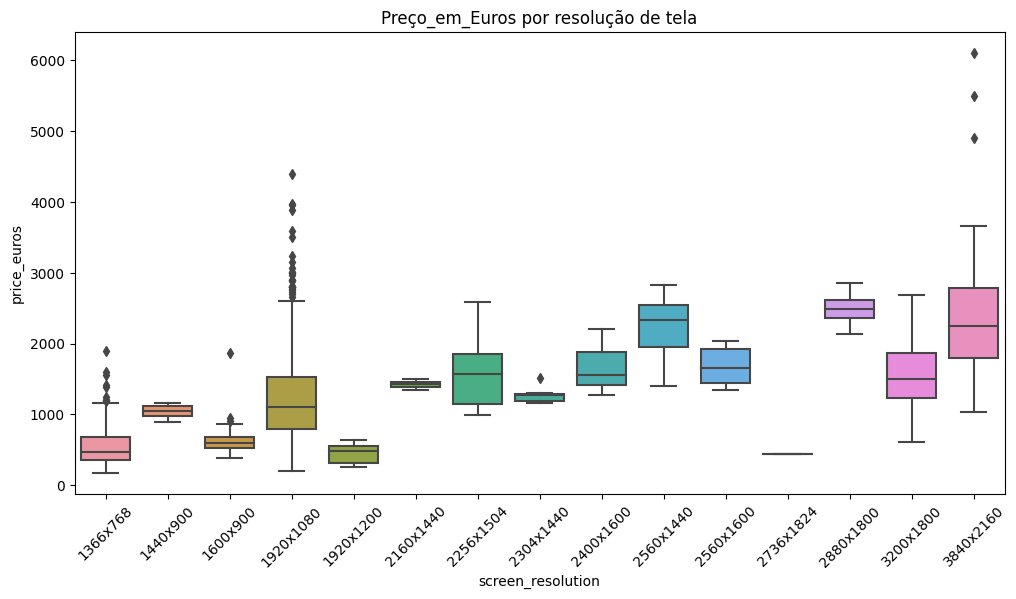

In [21]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "screen_resolution", title = "Preço_em_Euros por resolução de tela", rotate = 45)

### Pie

In [22]:
def make_pie_plot(data: any, x_axis: any, labels: any, title = "Sem título", rotation = 45, angle = 90) -> None:
    figure = plt.figure(figsize = (12, 6))
    plt.pie(
        x = x_axis,
        labels = labels,
        autopct = "%1.2f%%",
        startangle = angle,
        data = data
    )
    plt.xticks(rotation = rotation, size = 12)
    plt.yticks(size = 12)
    plt.title("Média dos preços")
    plt.show()

### Heatmap

In [23]:
def make_heatmap(data: any, rotation = 90) -> None:
    figure = plt.figure(figsize = (12, 6))
    sns.heatmap(data = data)
    plt.xticks(rotation = rotation)
    plt.show()

#### Correlação das variáveis

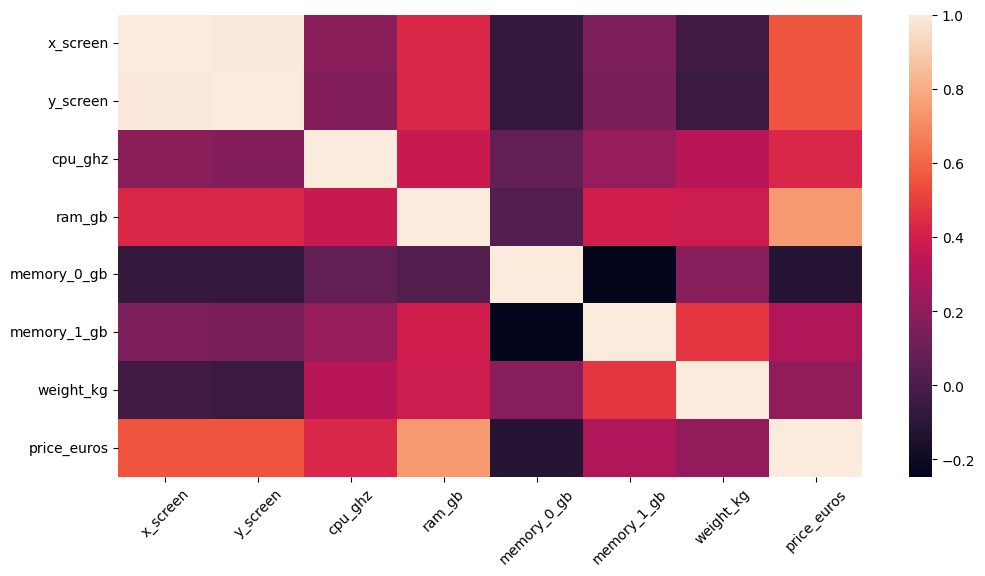

In [25]:
to_heatmap = laptop_price.corr(numeric_only=True)
make_heatmap(data = to_heatmap, rotation = 45)